In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 
plt.rcParams['figure.figsize'] = (16, 9) 
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("./articulos_ml.csv")

In [3]:
data.shape

(161, 8)

In [9]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [5]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


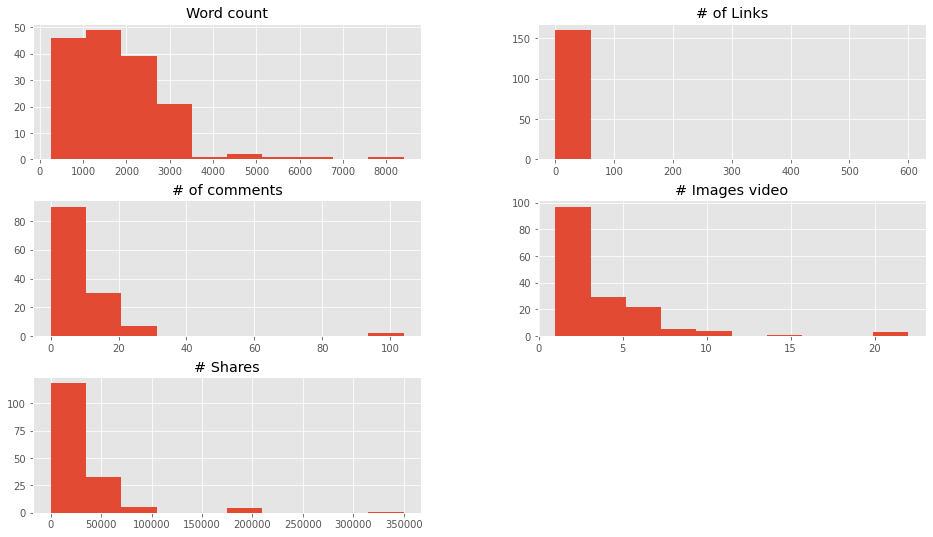

In [7]:
#Hago una selección de las columnas que quiero graficar.
data.drop(['Title','url', 'Elapsed days'],1).hist() 
plt.show()

In [14]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
colores=['orange','blue'] 
tamanios=[30,60]
filtered_data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
5,5 ways Data Science and Machine Learning impac...,NaN,761,0,NaN,1,14,21000
7,How Machine Learning can help Cryptocurrency T...,https://cryptovest.com/news/how-machine-learni...,753,3,0.0,1,78,77000
8,Tech companies should stop pretending AI won’t...,https://www.technologyreview.com/s/610298/tech...,1118,2,NaN,1,62,59400


In [16]:
filtered_data.shape

(148, 8)

In [13]:
f1 = filtered_data['Word count'].values 
f2 = filtered_data['# Shares'].values

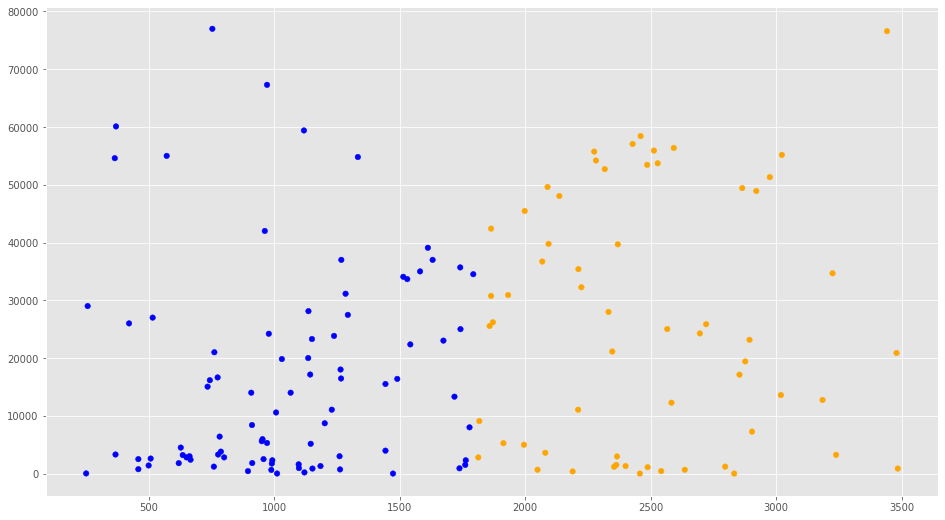

In [17]:
asignar = []
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808): 
        asignar.append(colores[0])
    else: 
        asignar.append(colores[1])
plt.scatter(f1, f2, c=asignar, s=tamanios[0]) 
plt.show()

In [19]:
dataX = filtered_data[["Word count"]] 
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [20]:
regr = linear_model.LinearRegression()

In [21]:
regr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = regr.predict(X_train)

In [23]:
y_pred[:5]

array([21125.61589425, 16681.44604148, 15536.21765635, 15490.63642709,
       17570.28001204])

In [24]:
#Para ver la pendiente calculada
regr.coef_

array([5.69765366])

In [25]:
#Para ver la intersección de la línea
regr.intercept_

11200.30322307416

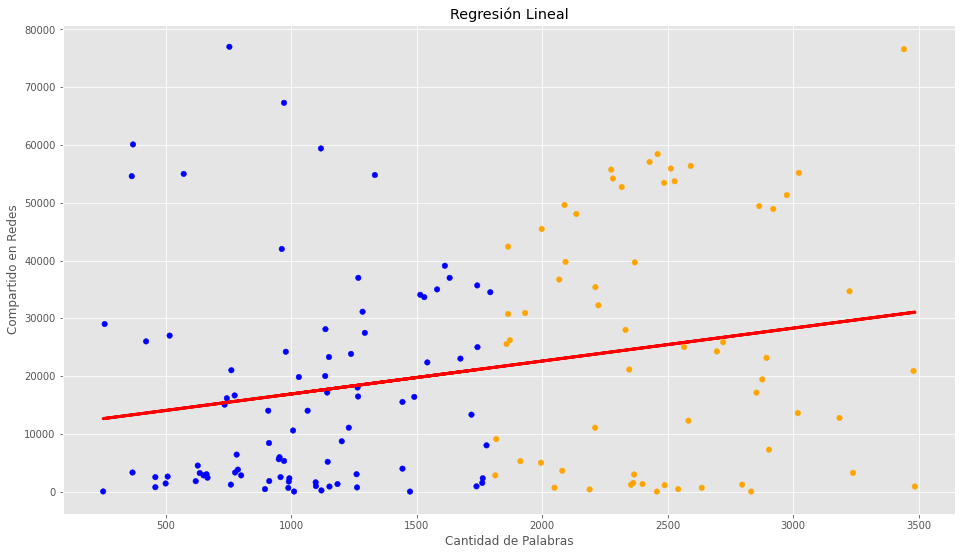

In [27]:
#dibujando la recta en mis datos
plt.scatter(X_train[:,0], y_train, c=asignar, s=tamanios[0]) 
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)
plt.xlabel('Cantidad de Palabras') 
plt.ylabel('Compartido en Redes') 
plt.title('Regresión Lineal')
plt.show()

In [28]:
#Generar una predicción para un artículo con 2000 palabras
y_Dosmil = regr.predict([[2000]]) 
y_Dosmil

array([22595.61053785])